In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds, LinearConstraint
from sklearn.manifold import SpectralEmbedding
import pandas as pd 

import pre_functions_clean as pf
import time_constant_shuffle_FLN as tc

In [2]:
MACAQUE_CASE=0
CONSENSUS_CASE=0

if MACAQUE_CASE: 
    if CONSENSUS_CASE:
        datafile='subgraph_data_macaque_consensus.pkl'
    else:
        datafile='subgraph_data_macaque.pkl'
else:
    if CONSENSUS_CASE:
        datafile='subgraph_data_marmoset_consensus.pkl'
    else:
        datafile='subgraph_data_marmoset.pkl'

# Initilization & Compute correlation matrix
p_ori = pf.load_data(datafile)
p_ori,W = pf.genetate_net_connectivity(p_ori,LINEAR_HIER=0,IDENTICAL_HIER=0,LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE)
exc_scale = p_ori['exc_scale']

p = pf.load_data(datafile)
# p = shuffle_hier(p)
p,W = pf.genetate_net_connectivity(p,LINEAR_HIER=0,IDENTICAL_HIER=0,LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE
                                   ,diverse_hi=4)
corr_mat_E, cov_mat_E = pf.generate_func_connectivity(p, W)

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA


G:\其他计算机\My Laptop\Desktop\2022Summer\Research\Large_Scale_Model\Program\pre_functions_clean.py:5551: ComplexWarning: Casting complex values to real discards the imaginary part
  Corr_mat_E[i,j]=np.real(Cov_mat[2*i,2*j])/np.sqrt(Cov_mat[2*i,2*i]*Cov_mat[2*j,2*j])


In [3]:
# Fit part hi
tau_exp = np.load('Data/Marmoset_Ji/Marmoset_Ji_Exp_Tau.npy')
area_exp = list(np.load('Data/Marmoset_Ji/Marmoset_Ji_Exp_Area.npy'))
tau_min = np.min(tau_exp)
hi_fit = 1 - tau_min / tau_exp
hi_exp = 0 * tau_exp
ind_exp = 0 * tau_exp

In [4]:
# Get full hi
area_full = p['areas']
hi_exp_full = p['hier_vals']
for i in range(len(area_exp)):
    ind_i = area_full.index(area_exp[i])
    hi_exp[i] = hi_exp_full[ind_i]
    ind_exp[i] = ind_i
ind_order = np.argsort(ind_exp)

In [12]:
def similar_tau(h):
    # h = h / np.max(h)
    tau = 1 / (1 - h + 1e-3)
    return - np.corrcoef(tau, tau_exp)[0,1]

def similar_gradient(h):
    return - np.corrcoef(h, hi_exp)[0,1]

def goal(h):
    return similar_tau(h) + similar_gradient(h)

def goal_x(x):
    h_temp = np.cumsum(x)
    h = np.zeros([len(h_temp)+1,])
    h[ind_order[1::]] = h_temp
    return goal(h)

In [13]:
h_test = minimize(goal, hi_exp)
h_get = h_test['x']
h_get = (h_get - np.min(h_get)) / (np.max(h_get) - np.min(h_get))
hi_fit = h_get

In [14]:
hi_fit_full = np.zeros([len(area_full),])
sigma = 0.05;
for i in range(len(area_full)):
    if area_full[i] in area_exp:
        hi_fit_full[i] = hi_fit[area_exp.index(area_full[i])]
    else:
        dist_i = abs(hi_exp_full[i] - hi_exp)
        weight_i =  np.exp(-(dist_i/sigma)**2); # 1/dist_i;
        hi_fit_i = np.dot(weight_i, hi_exp) / np.sum(weight_i)
        hi_fit_full[i] = hi_fit_i
        # hi_fit_full[i] = 0
hi_fit_full = (hi_fit_full - np.min(hi_fit_full)) / (np.max(hi_fit_full) - np.min(hi_fit_full))

In [15]:
hi_fit_new = hi_fit_full

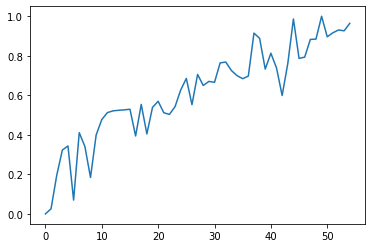

In [16]:
plt.plot(hi_fit_new)

In [10]:
# np.save('hier_vals_fit.npy', hi_fit_full)

In [23]:
hi_exp_full

array([0.      , 0.199037, 0.282678, 0.302499, 0.32583 , 0.327901,
       0.348767, 0.356592, 0.383012, 0.427297, 0.450307, 0.47063 ,
       0.485584, 0.491282, 0.495651, 0.501319, 0.505878, 0.517487,
       0.546284, 0.554003, 0.564269, 0.576581, 0.57765 , 0.584183,
       0.584402, 0.590339, 0.642642, 0.648122, 0.649583, 0.661737,
       0.666191, 0.669293, 0.674474, 0.686275, 0.689966, 0.692454,
       0.706569, 0.730936, 0.735132, 0.739906, 0.746087, 0.746558,
       0.774342, 0.779863, 0.783527, 0.816584, 0.821142, 0.874052,
       0.876127, 0.878034, 0.891529, 0.914878, 0.930073, 0.93874 ,
       1.      ])